# 1. Introduction
This paper summarises all techniques learned in **'IBM - Data Analysis with Python'**. The Learning Outcomes covered in this course are:
1. Development of Python code for cleaning and preparing data for analysis - including missing values, formatting, normalising, and binning publish_display_data.
2. Perform exploratory data analysis and apply analytical techniques to real-world datasets using libraries such as Pandas, Numpy and Scipy.
3. Manipulate data using dataframes, summarise data, understand data distribution, perform correlation and create data pipelines.
4. Build and evaluate regression models using machine learning scikit-learn library and use them for prediction and decision making.


In this notebook we are working as a Data Analyst working at a Real Estate Investment Trust. We are tasked with determining the market price of a house given a set of features. This report will analyse and predict housing prices using attributes and features such as square footage, number of bedrooms, number of floors, and so on.

## About this Dataset
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. Source:  [Kagge/House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01).

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [64]:
## Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

# 2. Importing the Data Set

In [47]:
# Might be required:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Download the dataset
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=0, index_col=0)

In [48]:
# Display the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
# Get a summary of the dataset we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long       

`df.info()` is ideal to check multiple criteria in a summary, such as the name of all columns, the shape, if any missing values occur and the data type of each column.

In [50]:
# Summary of the numerical variables
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 3. Data Wrangling
We will drop the column `id` and `date` as this variable would cause Overfitting in the data modelling process. Next, we will replace missing values with the columns mean or median value and check if any other errors need to be taken care of before we can proceed to the next phase: Exploratory Data Analysis (EDA).

In [51]:
# Drop unnecessary columns
df.drop(['id', 'date'], axis=1, inplace=True)

We need to check if any values are missing in our dataframe:

In [52]:
# Check if any NaN occur
df.isna().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

`bedrooms` and `bathrooms` contain `NaN` values. To ensure our model is being trained with a preprocessed dataset, we will replace the missing values of both columns with the mean value.

In [53]:
# Replace bedrooms NaN with mean
bedrooms_mean = df['bedrooms'].mean()
df.replace(np.nan, {'bedrooms': bedrooms_mean}, inplace=True)

# Replace bathrooms NaN with mean
bathroom_mean = df['bathrooms'].mean()
df.replace(np.nan, {'bathrooms': bathroom_mean}, inplace=True)

# Print the result:
print("Number of NaN values for the column bedrooms:", df['bedrooms'].isna().sum())
print("Number of NaN values for the column bathrooms:", df['bathrooms'].isna().sum())

Number of NaN values for the column bedrooms: 0
Number of NaN values for the column bathrooms: 0


# 4. Exploratory Data Analysis (EDA)


This section of the Data Analysis process will explore our dataset of its distribution and if outliers occur.

In [54]:
# Count the number of houses with unique floor values
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


A boxplot is ideal to visualise the distribution of a variable. It is also excellent in detecting hidden outliers in a variable.

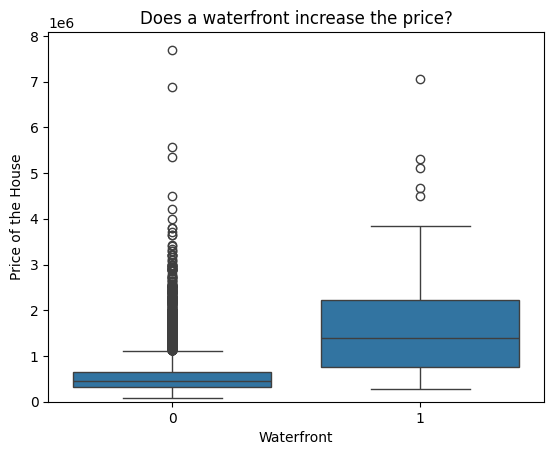

In [55]:
sns.boxplot(data=df, x='waterfront', y='price')
plt.title("Does a waterfront increase the price?")
plt.ylim(0,)
plt.xlabel("Waterfront")
plt.ylabel("Price of the House")
plt.show()

In [56]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

## Regression

We can use a `regplot` to determine if the feature `sqft_above` is negatively correlated with `price`. Regplot displays a regression line identicating if a linear relationship between the two features exists.

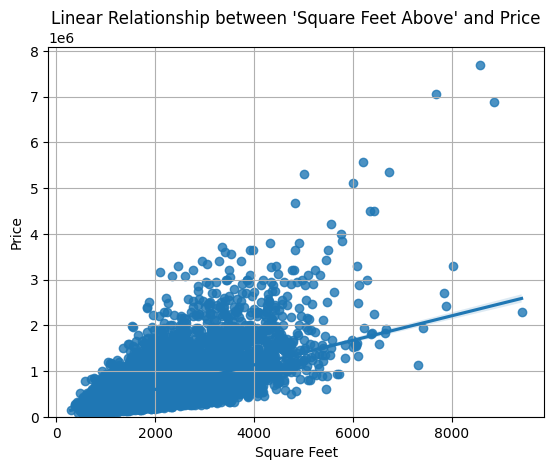

In [57]:
# Regplot
sns.regplot(data=df, x='sqft_above', y='price')
plt.ylim(0,)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Linear Relationship between 'Square Feet Above' and Price")
plt.grid()
plt.show()

We will fit a linear regression model using the longitude feature `sqft_above` and calculate the R^2.

In [58]:
# Simple Linear Regression Model
X = df[['sqft_above']]                                # Predictor
Y = df[['price']]                               # target variable
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.3667117528382793

An  R^2  value of 0.37 indicates that 37% of the variability in the dependent variable (response variable) can be explained by the independent variable(s) (predictors) in your model. Let's try to use multiple features and the corresponding R^2 score.

In [59]:
# Multiple Linear Regression
Z = np.asanyarray(df.drop('price', axis=1))
Y = np.asanyarray(df.pop('price'))
lm = LinearRegression()
lm.fit(Z, Y)
lm.score(Z, Y)


0.6997513873758983

Our model performed much better with multiple features to determine the price of a new apartment.

## Pipeline
A pipeline can be used to scale the data, perform a polynomial transformation and to fit a linear regression model. We will evalute our Pipeline using R^2.

In [60]:
# Pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
# Z = np.asanyarray(df.drop('price', axis=1))                   # Already defined
# Y = np.asanyarray(df.pop('price'))                            # Already defined
Z = Z.astype('float')
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8295394747749477


Steps involved:
1. We create a Pipeline that automates preprocessing (e.g., scaling, feature generation) and modeling steps
- StandardScaler(): Scales features to have zero mean and unit variance
- PolynomialFeature(): Creates polynomial features of the input (e.g, third-degree (quudratic), fourth-degree (cubic)) to model non-linear relationships.
- LinearRegression(): Fits a linear regression model to the processed data

2. Fit the Pipeline: The pipeline applies the transformations in sequence before fitting the linear regression model.
3. Predict and Evaluate:
- r2_score measures how well the model explains the variance in the target variable Y
4. The result of 0.82 means 82% of the variance in the target variable is explained by the model


# 5. Model Evaluation and Refinement
We will split our data into a training and testing set:

In [61]:
# Create X with the predcitor variables and y as the target feature
X = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]].values
Y                                                                   # Already defined
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=1)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])

Number of test samples: 3242
Number of training samples: 18371


We will create and fit a Ridge regression object using the training data and calculate the R^2 using the test data.

In [ ]:
# Using a Ridge Regression
RidgeModel = Ridge(alpha=.1)
RidgeModel.fit(X_train, y_train)
yhat = RidgeModel.predict(X_test)
print(f"The R^2 score is {r2_score(y_test, yhat)}.")

The R^2 score is 0.6478759163939081.


Ridge regression is a type of linear regression that includes L2 regularization, which penalizes large coefficients to prevent overfitting. An  R^2  score of ~0.65 suggests:
- The regularization term in Ridge helped control overfitting but didn’t fully capture the complexity of the data.
- The linear model is somewhat limited in explaining the variance of the target.

To close of this notebook, we perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the trainin set and repeat calculating the R^2 utilising the test data provided.

In [68]:
# Using a Polynomial regression as a more complex model for non-linear relationship
pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
RidgeModel.fit(X_train_pr, y_train)
y_hat = RidgeModel.predict(X_test_pr)
print(f"The R^2 score is {r2_score(y_test, y_hat)}.")


The R^2 score is 0.7002744264555714.


The  R^2  score for the Ridge regression model was 0.6479, meaning it explained about 64.8% of the variance in the target variable. Applying a degree-2 polynomial transformation increased the  R^2  score to 0.7003, an improvement of 5.5%. This indicates that non-linear relationships exist in the data that the linear Ridge model could not fully capture. By incorporating polynomial regression, the model better accounted for these complexities, making it more effective for this dataset.

The best model performance we achieved was using our Pipeline with an R^2 score of 0.83.